# Практическая работа №1: Краевая задача для уравнения II-го порядка

Выполнил студент гр. 9381 Аухадиев Александр, вариант 2.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

Задача Коши подразумевает поиск частного решения уравнения $y = \varphi(x)$ из числа общих, удовлетворяющих некоторым условиям. Общий вид задачи Коши:

\begin{cases}
   f(x, y, y', y'',...,y^{(n)} = 0\\
   y(x_0) = y_0\\
   y'(x_0) = y_1\\
   y''(x_0) = y_2\\
   ...\\
   y^{(n-1)}(x_0) = y_{n-1}
 \end{cases}
 
 

## Постановка задачи

Дано дифференциальное уравнение: 

$y'' = f(x,y), a < x < b$  (1)

и граничные условия

$y(a) = y_a$, $y(b) = y_b$  (2)

Требуется найти решение задачи (1)-(2) и построить его график.

Рассмотрим задачу Коши для уравнения (1) с начальными условиями

$y(a) = y_a$, $y'(a) = h$  (3)

План решения основан на многократном решении задачи Коши (1), (3). Значение решения задачи Коши при 𝑥 = 𝑏 является функцией от ℎ. 
Задача сводится к отысканию такого значения переменной ℎ, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться

$y(b, h) = y_b$ (4)

Это уравнение с одним неизвестным ℎ.
Для его решения можно применить стандартный метод половинного деления.

## Выполнение работы

$f(x, y) = {lnx \over {y^2  +1}}$, $a < x < b$

$y_a = 3$, $y_b = -3$

$a = 0$, $b = 2$

Общий вид задачи Коши:

\begin{cases}
   y'' - {lnx \over {y^2  +1}} = 0\\
   y(0) = 3\\
   y'(0) = h\\
 \end{cases}

In [57]:
import scipy.integrate as integ
import numpy as np
import matplotlib.pyplot as plt
import math

h =  1
y(b,h) =  4.841930389721817
h =  -3.5
y(b,h) =  -4.363140736585396
h =  -2.25
y(b,h) =  -1.6993662191075574
h =  -3.125
y(b,h) =  -3.555664184747986
h =  -2.6875
y(b,h) =  -2.626347422809205
h =  -2.90625
y(b,h) =  -3.0880059071928203
h =  -2.828125
y(b,h) =  -2.922431799373822
h =  -2.8828125
y(b,h) =  -3.03824454597512
h =  -2.85546875
y(b,h) =  -2.9802862639531265
h =  -2.869140625
y(b,h) =  -3.0092523666921873
h =  -2.8623046875
y(b,h) =  -2.994766058095277
h =  -2.86572265625
y(b,h) =  -3.002008397473369
h =  -2.864501953125
y(b,h) =  -2.9994216606422763


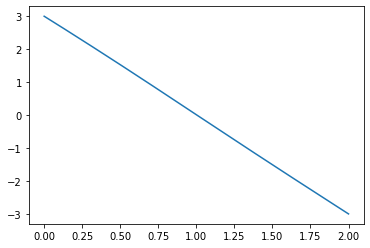

In [95]:
def func(t, r):
    y, g = r
    fy = g                       # Система дифференциальных
    fg = math.log(t)/(y**2 + 1)  # уравнений
    return fy, fg

def solve(h):
    a = 0.000000001  # Нельзя использовать значение, равное нулю, так как невозможно будет использовать логарифм
    b = 2
    ya = 3
    steps = 1000
    
    #Численное решение методом Рунге-Кутты 5(4)-го порядка
    return integ.solve_ivp(func,(a, b), (ya, h), t_eval=np.linspace(a, b, steps), method='RK45')

h = 1    #Задаём наугад h0
M = 100  #Максимальное количество шагов
yb = -3
delta_h = 1

sol = yb + 1  # = y(b, h), первоначальное значение - любое, отличающееся от yb больше, чем на 0.001
solution = None

while(abs(sol - yb) > 0.001) | (M <= 0):
    solution = solve(h)
    sol = solution.y[0][999]  # = y(b, h)
    print("h = ", h)
    print("y(b,h) = ", sol)
    h1 = h  
    h2 = h    
    while(True):
        
        h1 += delta_h
        sol1 = solve(h1).y[0][999]

        h2 -= delta_h
        sol2 = solve(h2).y[0][999]
        
        # Поиск подходящего h методом половинного деления
        if (sol1 - yb)*(sol - yb) <= 0:
            h = h1 + delta_h/2
            break
        
        if (sol2 - yb)*(sol - yb) <= 0:
            h = h2 - delta_h/2
            break
    
    delta_h /= 2
    M -= 1
    
plt.plot(solution.t, solution.y[0])

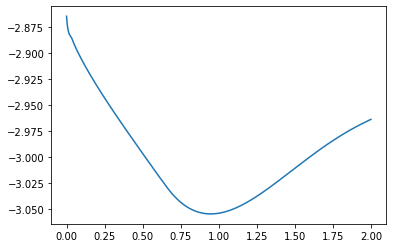

In [94]:
plt.plot(solution.t, solution.y[1])

## Выводы

Была решена краевая задача для уравнения II-го порядка путём многократного решения задачи Коши. Было найдено значение $h = -2.864501953125$, удовлетворяющее условию $y(b, h) = y_b$ с допустимой погрешностью 0.001, где $y(b, h) = -2.9994216606422763$